# Project 4
# Julie Bougard

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
#Given variables
R = 30
vtip = 780
lt = -8 * np.pi/180
claroot = 2*np.pi
c75 = 2

In [4]:
Nb = 5

In [5]:
n = 1000
r = np.linspace(0.00001, 1, n)
dr = r[1] - r[0]

In [6]:
x = 4
theta75 = np.linspace(2.5,10,x)
theta75 = theta75 * np.pi/180

In [16]:
def Model(tr, clatip):
    c = []
    sigma = []
    cla = []
    theta = np.zeros((len(theta75), len(r)))
    lam_all = np.zeros((len(theta75), len(r)))
    F_all = np.zeros((len(theta75), len(r)))
    dCTdr_all = np.zeros((len(theta75), len(r)))
    dCPdr_all = np.zeros((len(theta75), len(r)))
    CT_all = []
    CP_all = []

    for i in range(len(theta75)):
        CT = 0
        CP = 0
        for j in range(len(r)): 
            c_r = c75/(tr + (1-tr)/4) * (tr + (1-tr)*(1-r[j]))
            c.append(c_r)
            sigma_r = Nb * c_r / (2 * np.pi * r[j])
            sigma.append(sigma_r)
            cla_r = claroot  - (claroot - clatip)*r[j]
            cla.append(cla_r)
            theta_r = theta75[i] + lt * (r[j] - 0.75)
            theta[i][j] = theta_r

            Fn = 1
            lamn = 1/(16*Fn)*sigma_r*cla_r*(np.sqrt(1+32*Fn/(sigma_r*cla_r)*theta_r*j)-1)

            for k in range(20):
                if lamn == 0:
                    lamn = 0.000001
                f = (Nb/2) * (1-r[j])/(lamn)
                Fn1 = 2/np.pi*np.arccos(math.exp(-f))
                if Fn1 == 0:
                    Fn1 = 0.000001

                lamn1 = 1/(16*Fn1)*sigma_r*cla_r*(np.sqrt(1+32*Fn1/(sigma_r*cla_r)*theta_r*r[j])-1)
                error = abs((lamn1 - lamn)/lamn1)

                if error < 0.005:
                    break

                lamn = lamn1

            F = Fn1
            F_all[i,j] = F
            lam_r = lamn1
            lam_all[i,j] = lam_r

            dCTdr = 4 * F * lam_r**2
            dCPdr = 4 * F * lam_r**3
            dCTdr_all[i,j] = dCTdr
            dCPdr_all[i,j] = dCPdr

            CT = CT + dCTdr * dr
            CP = CP + dCPdr * dr

        CT_all.append(CT)
        CP_all.append(CP)
    fig_a = plt.figure(figsize=(10,5))
    for i in range(len(theta75)):
        fig_a.plot(r,F_all[i],label="line 3")
#     fig = plt.figure(figsize=(10,5))
    fig_a.xlabel("r, nondimensional radial position")
    fig_a.ylabel("F, tip loss factor")
    plt.show()
    
#     plt.xlabel("r, nondimensional radial position")
#     plt.ylabel("F, tip loss factor")
#     plt.show()
    

    for i in range(len(theta75)):
        plt.plot(r,lam_all[i])
    plt.xlabel("r, nondimensional radial position")
    plt.ylabel("lambda, induced inflow ratio")
    plt.show()

    for i in range(len(theta75)):
        plt.plot(r,dCTdr_all[i])
    plt.xlabel("r, nondimensional radial position")
    plt.ylabel("dCT/dr, Thrust gradient")
    plt.show()

    for i in range(len(theta75)):
        plt.plot(r,dCPdr_all[i])
    plt.xlabel("r, nondimensional radial position")
    plt.ylabel("dCP/dr, Power gradient")
    plt.show()
    
    return F_all, lam_all, dCTdr_all, dCPdr_all, CT_all, CP_all

## Config 1

In [17]:
tr1 = 1
clatip1 = 2 * np.pi
F_all1, lam_all1, dCTdr_all1, dCPdr_all1, CT_all1, CP_all1 = Model(tr1, clatip1)

AttributeError: 'Figure' object has no attribute 'plot'

<Figure size 720x360 with 0 Axes>

## Config 2

In [13]:
tr2 = 1
clatip2 = 6.0
F_all2, lam_all2, dCTdr_all2, dCPdr_all2, CT_all2, CP_all2 = Model(tr2, clatip2)

NameError: name 'fig_a' is not defined

## Config 3

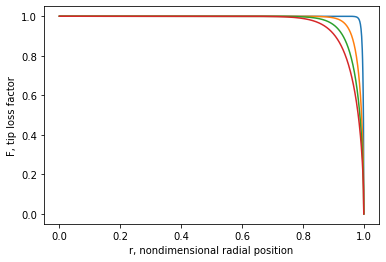

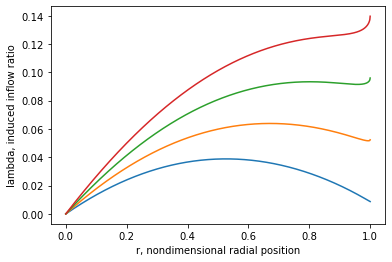

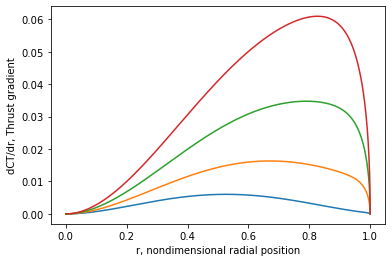

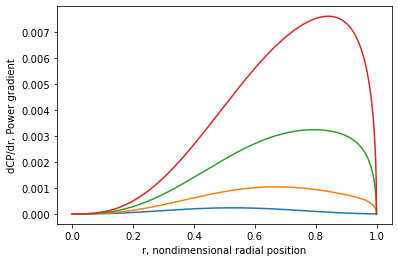

In [9]:
tr3 = 1/2
clatip3 = 2 * np.pi
F_all3, lam_all3, dCTdr_all3, dCPdr_all3, CT_all3, CP_all3 = Model(tr3, clatip3)

## Config 4

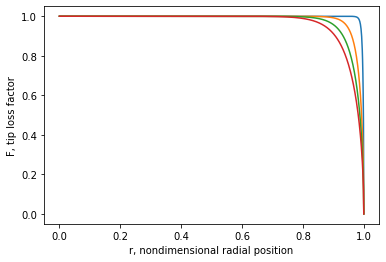

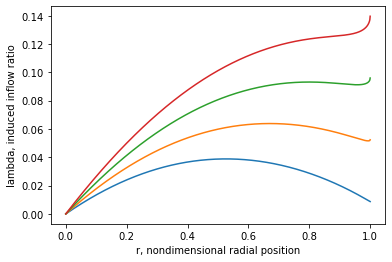

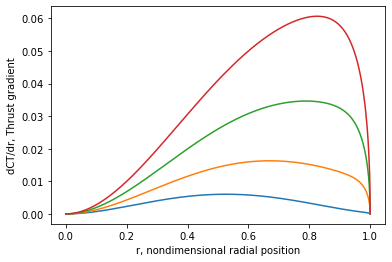

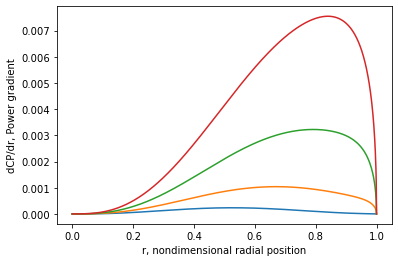

In [10]:
tr4 = 1/2
clatip4 = 6.0
F_all4, lam_all4, dCTdr_all4, dCPdr_all4, CT_all4, CP_all4 = Model(tr4, clatip4)

## Comparing Configurations

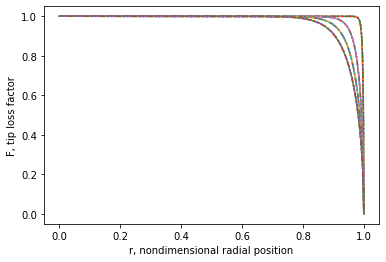

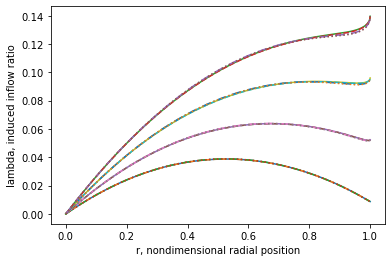

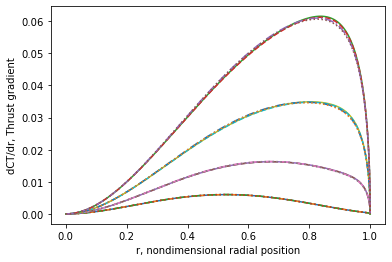

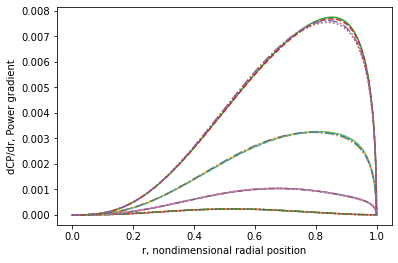

In [11]:
for i in range(len(theta75)):
    plt.plot(r,F_all1[i], '-')
    plt.plot(r,F_all2[i], '--')
    plt.plot(r,F_all3[i], '-.')
    plt.plot(r,F_all4[i], ':')
plt.xlabel("r, nondimensional radial position")
plt.ylabel("F, tip loss factor")
plt.show()

for i in range(len(theta75)):
    plt.plot(r,lam_all1[i], '-')
    plt.plot(r,lam_all2[i], '--')
    plt.plot(r,lam_all3[i], '-.')
    plt.plot(r,lam_all4[i], ':')
plt.xlabel("r, nondimensional radial position")
plt.ylabel("lambda, induced inflow ratio")
plt.show()

for i in range(len(theta75)):
    plt.plot(r,dCTdr_all1[i], '-')
    plt.plot(r,dCTdr_all2[i], '--')
    plt.plot(r,dCTdr_all3[i], '-.')
    plt.plot(r,dCTdr_all4[i], ':')
plt.xlabel("r, nondimensional radial position")
plt.ylabel("dCT/dr, Thrust gradient")
plt.show()

for i in range(len(theta75)):
    plt.plot(r,dCPdr_all1[i], '-')
    plt.plot(r,dCPdr_all2[i], '--')
    plt.plot(r,dCPdr_all3[i], '-.')
    plt.plot(r,dCPdr_all4[i], ':')   
plt.xlabel("r, nondimensional radial position")
plt.ylabel("dCP/dr, Power gradient")
plt.show()